In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
#生データ
df17 = pd.read_csv('2017.csv', index_col=0)
df16 = pd.read_csv('2016.csv', index_col=0)

In [ ]:
#使う変数に絞る
df17 = df17.drop(['Region', '1st Add', '', '', '', '', '',])
df16 = df16

In [ ]:
#Total TimeとWater usageの集約


In [8]:
df17.describe()

,Region,Coffee Weight,Grind,Water Weight,Temp,1st Add,1st Swirl/Stir,2nd Add,2nd Swirl/Stir,3rd Swirl/Stir,Total Swirl/Stir
count,0.0,59.000000,59.000000,59.000000,59.000000,59.000000,45.000000,43.000000,19.0,0.0,59.000000
mean,NaN,24.250847,5.983051,225.059322,85.406780,87.864407,0.977778,135.906977,1.0,NaN,1.067797
std,NaN,6.674588,2.438849,44.843991,5.857853,54.368937,0.149071,54.041348,0.0,NaN,0.612074
min,NaN,15.000000,0.000000,100.000000,65.000000,15.000000,0.000000,0.000000,1.0,NaN,0.000000
25%,NaN,19.000000,4.000000,206.750000,82.000000,50.000000,1.000000,100.000000,1.0,NaN,1.000000
50%,NaN,23.000000,6.000000,230.000000,85.000000,70.000000,1.000000,130.000000,1.0,NaN,1.000000
75%,NaN,30.000000,8.000000,245.000000,90.000000,127.500000,1.000000,180.000000,1.0,NaN,1.000000
max,NaN,40.000000,10.000000,400.000000,97.000000,240.000000,1.000000,225.000000,1.0,NaN,2.000000


In [14]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, AUSTRALIAN to WELSH
Data columns (total 31 columns):
Origin              59 non-null object
Region              0 non-null float64
Coffee              59 non-null object
Position            59 non-null object
Filter              59 non-null object
Preperation         37 non-null object
Coffee Weight       59 non-null float64
Grinder             59 non-null object
Grind               59 non-null int64
Water Weight        59 non-null float64
Type                59 non-null object
Temp                59 non-null int64
1st Add             59 non-null int64
1st Time            59 non-null object
1st Swirl/Stir      45 non-null float64
2nd Add             43 non-null float64
2nd Time            43 non-null object
2nd Swirl/Stir      19 non-null float64
3rd Add             5 non-null object
3rd Time            5 non-null object
3rd Swirl/Stir      0 non-null float64
Press time          59 non-null object
Dilution            33 non-null 

In [9]:
df16.describe()

,Coffee Weight,Grind,Water Weight,Temp,1st Add,1st Time,1st Swirl/Stir,2nd Add,2nd Time,2nd Swirl/Stir,3rd Add,3rd Time,3rd Swirl/Stir,Total Swirl/Stir
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,38.0,27.000000,27.000000,12.0,3.000000,3.000000,1.0,59.000000
mean,22.39000,5.640000,231.600000,86.260000,105.520000,55.900000,1.0,163.296296,44.111111,1.0,33.333333,40.000000,1.0,0.864407
std,5.36836,2.164274,22.163585,6.213251,72.304978,38.935976,0.0,40.144752,42.843484,0.0,28.867513,17.320508,NaN,0.655418
min,15.00000,1.000000,120.000000,70.000000,30.000000,0.000000,1.0,50.000000,0.000000,1.0,0.000000,30.000000,1.0,0.000000
25%,18.00000,4.250000,221.250000,82.000000,50.000000,30.000000,1.0,150.000000,13.000000,1.0,25.000000,30.000000,1.0,0.000000
50%,20.00000,5.500000,236.500000,85.000000,70.000000,42.500000,1.0,170.000000,30.000000,1.0,50.000000,30.000000,1.0,1.000000
75%,26.87500,7.000000,243.750000,90.000000,120.000000,73.750000,1.0,190.000000,60.000000,1.0,50.000000,45.000000,1.0,1.000000
max,35.00000,9.000000,260.000000,98.000000,260.000000,180.000000,1.0,216.000000,180.000000,1.0,50.000000,60.000000,1.0,2.000000


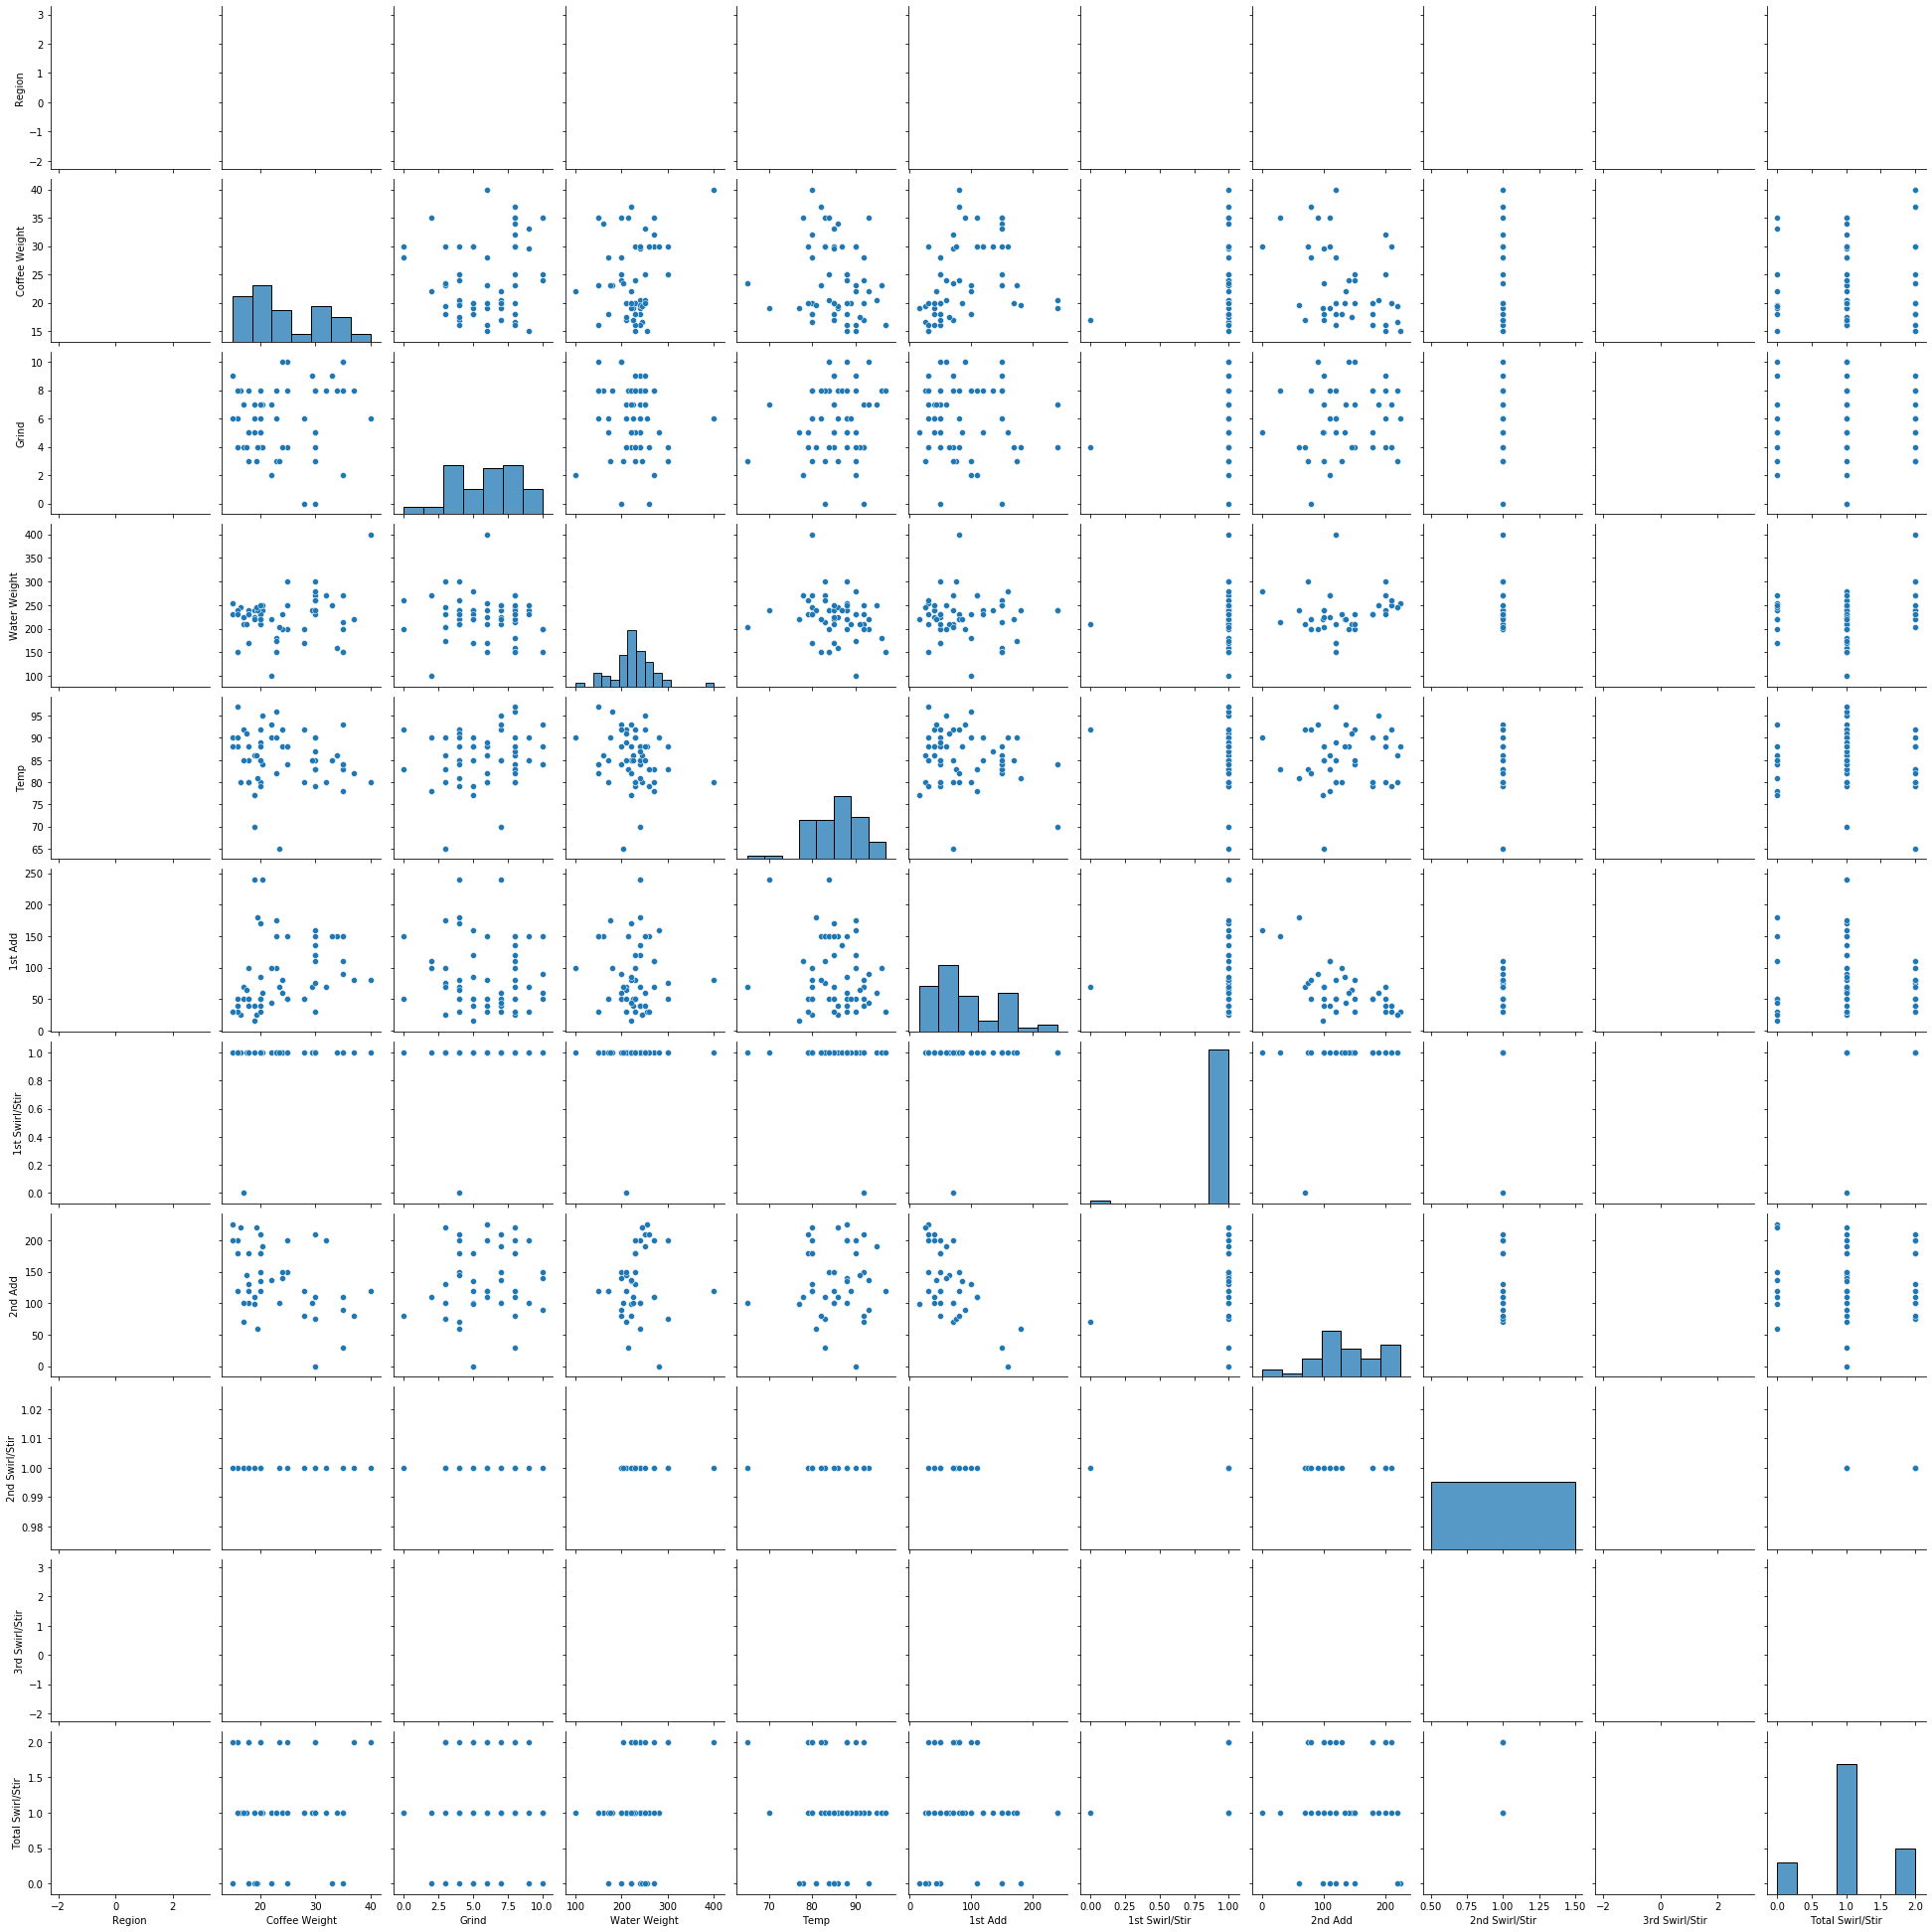

In [13]:
pg = sns.pairplot(df17)